In [33]:
#Importo las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:

data = pd.read_excel('regression_data.xls')
#Genero una copia de seguridad. 
df=data.copy()
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [22]:
#comienzo con la eploración de la base de datos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

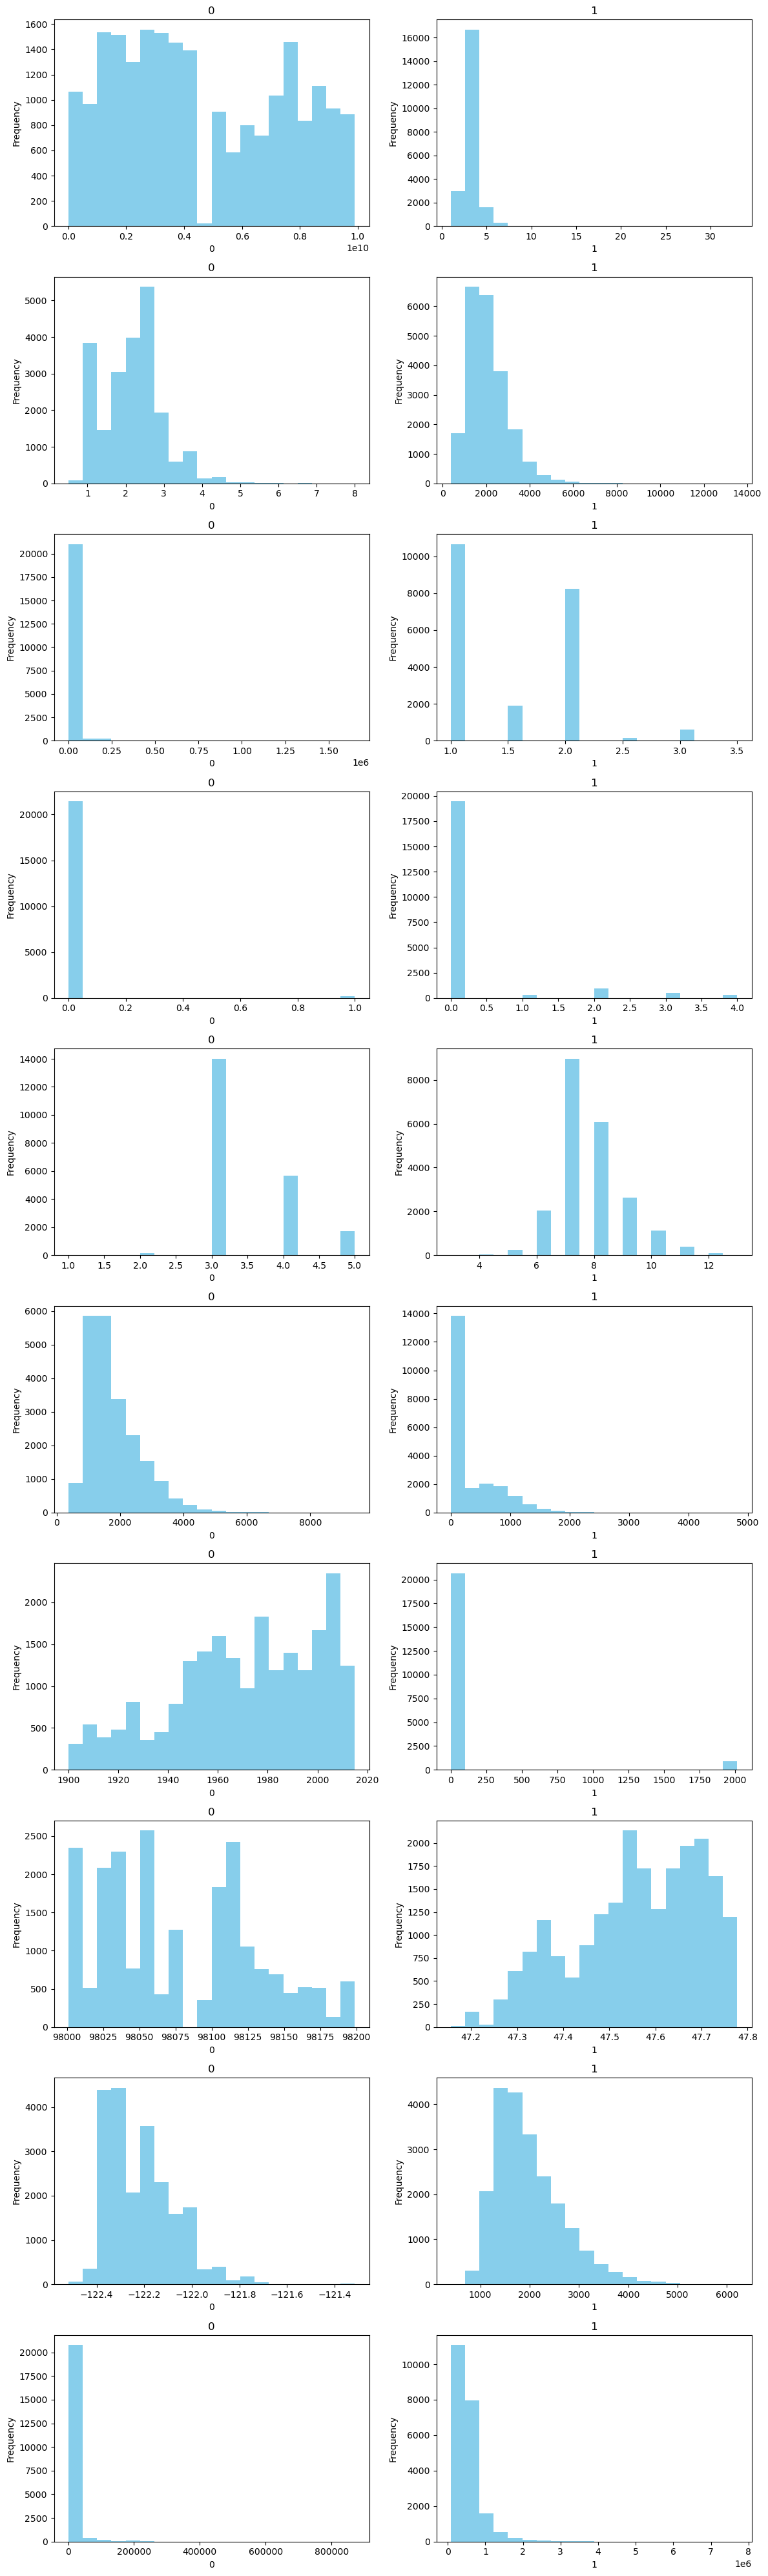

In [28]:
#Grafico las variables numericas, para ver la distribución 

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Obtener el número de columnas y filas para el diseño del gráfico
num_cols = numeric_columns.shape[1]
num_rows = int(num_cols / 2) + (num_cols % 2)

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Recorrer cada columna numérica y graficar su distribución
for i, col in enumerate(numeric_columns.columns):
    row = i // 2
    col = i % 2
    axes[row, col].hist(numeric_columns.iloc[:, i], bins=20, color='skyblue')
    axes[row, col].set_title(col)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(col)  # Agregar el nombre de la columna debajo del gráfico

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\roriv\AppData\Local\Temp\ipykernel_35280\2397173645.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr(method='pearson')  # default


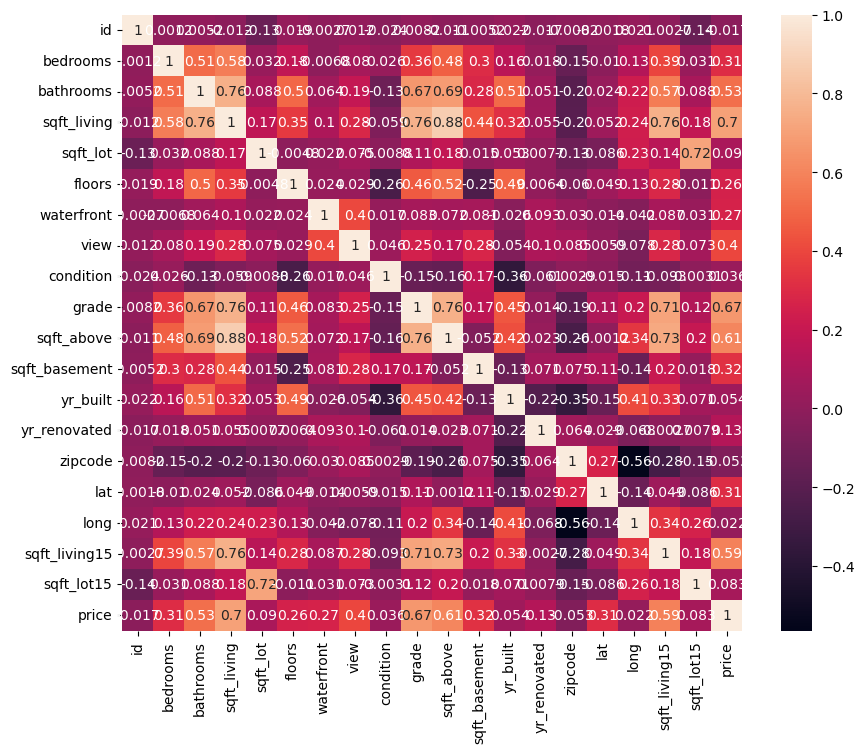

In [29]:
#analizo correlaciones entre variables. 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

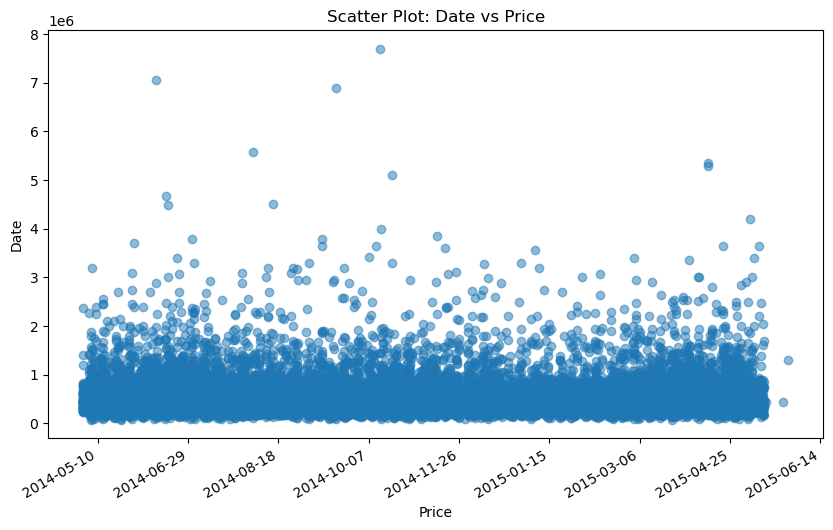

In [32]:
# Analizo la relación e implicancia que puede llegar a tener la columna date. Al no mostrarse una correlación, voy a eliminar la columna. 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convertir la columna 'date' a valores numéricos
data['date_numeric'] = mdates.date2num(data['date'])

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['date_numeric'], data['price'], alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha en el eje X
plt.xlabel('Price')
plt.ylabel('Date')
plt.title('Scatter Plot: Date vs Price')
plt.gcf().autofmt_xdate()  # Rotar etiquetas del eje X para mayor legibilidad
plt.show()

### **Tratamiento variables numericas**.

In [34]:
df_numerical = df.select_dtypes(include=np.number)

In [36]:

transformer=StandardScaler().fit(df_numerical)
x_normalized=transformer.transform(df_numerical)
df_norm=pd.DataFrame(x_normalized)
col_num=df_numerical.columns
df_norm.columns=col_num
df_norm

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.886034,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.735251,-0.659031,-0.544678,-0.210210,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,-0.866716
1,0.637413,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.460776,0.244602,-0.680850,4.744842,0.879210,1.161376,-0.746286,-0.432887,-0.187700,-0.006252
2,0.365362,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.230575,-0.659031,-1.293626,-0.210210,-0.933473,1.283355,-0.135144,1.070292,-0.172190,-0.980773
3,-0.727673,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,-0.892305,1.396734,-0.204247,-0.210210,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.173409
4,-0.912887,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.131197,-0.659031,0.544700,-0.210210,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-1.500859,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.087205,-0.305715,-0.629986,0.291589,-0.312413,-0.659031,1.293648,-0.210210,0.468086,1.004752,-0.938156,-0.666390,-0.412457,-0.490790
21593,0.702057,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.087205,-0.305715,-0.629986,0.291589,0.629911,-0.659031,1.463863,-0.210210,1.271647,-0.356503,-1.051856,-0.228571,-0.203796,-0.381905
21594,-1.062748,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,-0.928548,-0.659031,1.293648,-0.210210,1.234272,0.247617,-0.604160,-1.410683,-0.394198,-0.376186
21595,-1.491018,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.087205,-0.305715,-0.629986,0.291589,-0.227845,-0.659031,1.123432,-0.210210,-0.952160,-0.184722,1.030289,-0.841518,-0.420597,-0.381905


In [38]:
Y=df_norm['price']
X=df_norm.drop(['price'] , axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.6911583603392841

In [39]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2800.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:08:58   Log-Likelihood:            -2.9438e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.815e+06   2.93e+06      2.323

Primeras aproximaciones:

Con esta primera regresion lineal, se puede observar que las variables que mas influyen en el precio, son sqft_living, Waterfront, grade y lat. 

### PROBANDO OTROS MODELOS.

In [51]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
knn_regressor = KNeighborsRegressor(n_neighbors=4)  # Puedes ajustar el valor de K según tus necesidades
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [62]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 89383897890.31117
R-squared: 0.31357355768059214


In [52]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

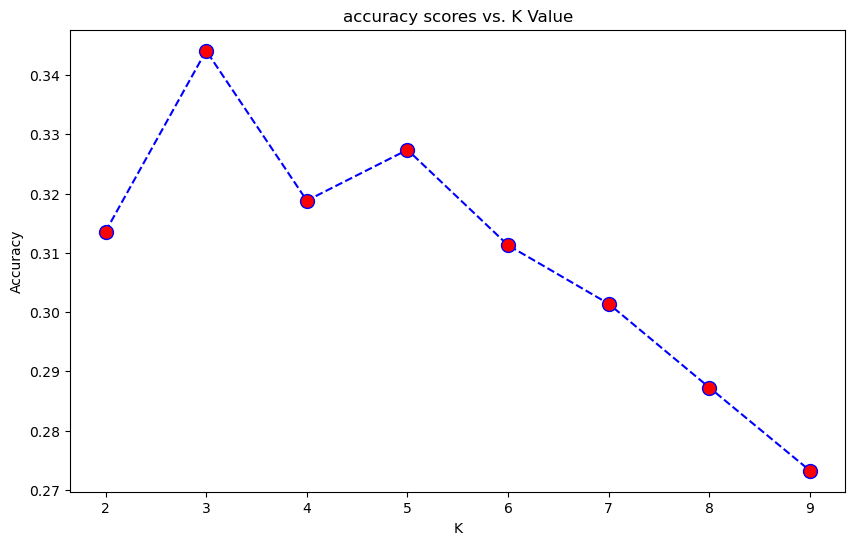

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Probando diferentes valores de K(vecinos), no se ha podido conseguir un score mayor a 0.31. 

# 2º TRATAMIENTO DE VARIABLES

Al ver los resultados de mi modelo anterior. Realizo un segundo tratamiento de las variables. 

In [98]:
df3_numerical= df_numerical.copy()
df3_numerical

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [99]:
# Voy a mirar columna por columna, los valores. 

df3_numerical['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [100]:
# Elimino los valores 11 y 33. considero que son errores. 
df2_numerical = df3_numerical[~df3_numerical['bedrooms'].isin([11, 33])]
unique_bedrooms = df3_numerical['bedrooms'].unique()
print(unique_bedrooms)

[ 3  2  4  5  1  6  7  8  9 11 10 33]


In [101]:
#Elimino la variable ID, ya que al ser numerica, no quiero que afecte a mi modelo. Ademas considero que en mi linea de analisis no es fundamental. 
df3_numerical.drop(['id'], axis=1, inplace=True)


In [103]:
df3_numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [113]:
# Voy a trabajar la variable grade(numerica) como ordinal. 
categories = pd.Categorical(df3_numerical['grade'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ordered=True)
df3_numerical['grade_ordinal'] = categories


In [114]:
# voy a trabajar la variable condition, tambien como ordinal 
categories_condition = pd.Categorical(df3_numerical['condition'], categories=[1, 2, 3, 4, 5], ordered=True)
df3_numerical['condition_ordinal'] = categories_condition

In [115]:
# en este caso, voy a definir una funcion que me calcule los años que tiene la vivienda. En caso que tenga reforma, la diferencia se practicará con el año de reforma y no con el año de contrucción. 

current_year = 2015

df3_numerical['diff_yr_built'] = current_year - df3_numerical['yr_built']
df3_numerical['diff_yr_renovated'] = np.where(df3_numerical['diff_yr_renovated'] == 2015, 0, df3_numerical['diff_yr_renovated'])

In [116]:
df3_numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,grade_ordinal,house_years,diff_yr_built,diff_yr_renovated,condition_ordinal
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,7,60.0,60,0,3
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,7,24.0,64,24,3
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,6,82.0,82,0,3
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,7,50.0,50,0,5
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,8,28.0,28,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,8,6.0,6,0,3
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,8,1.0,1,0,3
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,7,6.0,6,0,3
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,8,11.0,11,0,3


In [120]:
#df3_numerical.drop(['yr_built','yr_renovated', 'house_years', 'grade', 'condition' ], axis=1, inplace=True) SE DROPEARON CORRECTAMENTE LAS COLUMNAS, PERO AL VOLVER A CORRER EL CODIGO DA ERROR, 
df3_numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,grade_ordinal,diff_yr_built,diff_yr_renovated,condition_ordinal
0,3,1.00,1180,5650,1.0,0,0,1180,0,98178,47.5112,-122.257,1340,5650,221900,7,60,0,3
1,3,2.25,2570,7242,2.0,0,0,2170,400,98125,47.7210,-122.319,1690,7639,538000,7,64,24,3
2,2,1.00,770,10000,1.0,0,0,770,0,98028,47.7379,-122.233,2720,8062,180000,6,82,0,3
3,4,3.00,1960,5000,1.0,0,0,1050,910,98136,47.5208,-122.393,1360,5000,604000,7,50,0,5
4,3,2.00,1680,8080,1.0,0,0,1680,0,98074,47.6168,-122.045,1800,7503,510000,8,28,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,1530,0,98103,47.6993,-122.346,1530,1509,360000,8,6,0,3
21593,4,2.50,2310,5813,2.0,0,0,2310,0,98146,47.5107,-122.362,1830,7200,400000,8,1,0,3
21594,2,0.75,1020,1350,2.0,0,0,1020,0,98144,47.5944,-122.299,1020,2007,402101,7,6,0,3
21595,3,2.50,1600,2388,2.0,0,0,1600,0,98027,47.5345,-122.069,1410,1287,400000,8,11,0,3


In [121]:
# Voy a tratar variables waterfront, view y zipcode como categoricas y les voy a generar Dummies para sus valores. 
df3_numerical['waterfront'] = df3_numerical['waterfront'].astype(str)
df3_numerical['view'] = df3_numerical['view'].astype(str)
df3_numerical['zipcode'] = df3_numerical['zipcode'].astype(str)

# Aplicar one-hot encoding para obtener variables dummy
waterfront_dummy = pd.get_dummies(df3_numerical['waterfront'], prefix='waterfront', drop_first=True)
view_dummy = pd.get_dummies(df3_numerical['view'], prefix='view', drop_first=True)
zipcode_dummy = pd.get_dummies(df3_numerical['zipcode'], prefix='zipcode', drop_first=True)

# Eliminar las columnas originales y agregar las variables dummy al DataFrame
df3_numerical.drop(['waterfront', 'view', 'zipcode'], axis=1, inplace=True)
df3_numerical = pd.concat([df3_numerical, waterfront_dummy, view_dummy, zipcode_dummy], axis=1)

In [122]:
df3_numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,grade_ordinal,diff_yr_built,diff_yr_renovated,condition_ordinal,waterfront_1,view_1,view_2,view_3,view_4,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650,221900,7,60,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639,538000,7,64,24,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,2720,8062,180000,6,82,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000,604000,7,50,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503,510000,8,28,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0,47.6993,-122.346,1530,1509,360000,8,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,2310,0,47.5107,-122.362,1830,7200,400000,8,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,1020,0,47.5944,-122.299,1020,2007,402101,7,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,1600,0,47.5345,-122.069,1410,1287,400000,8,11,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# Voy a aplicar Logaritmo al precio por que tiene una distribución exponencial. 

df3_numerical['price_log'] = np.log(df3_numerical['price'])

In [125]:
# Voy a escalar el resto de columnas 

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto Min-Max Scaler
scaler = MinMaxScaler()

# Lista de columnas numéricas que se escalarán (excluyendo "price" y "price_log")
columns_to_scale = [col for col in df3_numerical.columns if col not in ['price', 'price_log']]

# Aplicar Min-Max Scaler a las columnas numéricas
df3_numerical[columns_to_scale] = scaler.fit_transform(df3_numerical[columns_to_scale])

## 2º Modelo de Regresion Lineal. 

en este segundo modelo se han ingresado variables tratadas de la siguiente forma. 
- Se eliminaron outliers de Bedrooms (33 y 11)
- se dropeo ID 
- se hizo una diferencia entre el año de contruccion y el año mas reciente (2015) tambien el año de reforma.
- Grade y condition se trataron como variables categoricas ordinales 
- waterfront, view y zipcode, se trataron como variables categoricas y se hicieron dummies. 

In [128]:
df3_model = df3_numerical.copy()
df3_model.drop(['price'], axis=1, inplace=True)

In [129]:
y=df3_model['price_log']
x=df3_model.drop(['price_log'] , axis=1)
x_train, x_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(x_train, Y_train)
predictions=lm.predict(x_test)
r2_score(Y_test, predictions)

0.8739529372637485

In [130]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1744.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:45:11   Log-Likelihood:                 5846.8
No. Observations:               21597   AIC:                        -1.152e+04
Df Residuals:                   21508   BIC:                        -1.081e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.4640      0.02

In [136]:
# Obtener los coeficientes y sus p-valores de la regresión lineal
# Obtener los coeficientes y sus p-valores de la regresión lineal
coefficients = model.params
p_values = model.pvalues

# Crear un DataFrame con los coeficientes y sus p-valores
coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'P-value': p_values})

# Filtrar solo aquellos coeficientes con p-value igual a 0 o muy cercano a 0
significant_coefficients = coefficients_df[coefficients_df['P-value'] <= 0.05]

# Ordenar los coeficientes de manera descendente
significant_coefficients_sorted = significant_coefficients.sort_values(by='Coefficient', ascending=False)

# Filtrar solo los coeficientes con p-value igual a 0
significant_coefficients_sorted_zero_p = significant_coefficients_sorted[significant_coefficients_sorted['P-value'] == 0]

print(significant_coefficients_sorted_zero_p)

               Coefficient  P-value
const            11.463973      0.0
sqft_above        1.165344      0.0
grade_ordinal     0.943279      0.0
sqft_living       0.898372      0.0


### Regresion lineal con GRADE.

In [137]:
# al ver que grade tiene una vinculación con precio, quiero saber que variables pueden explicar a Grade. 
#Haré un regresion lineal con Grade como variable dependiente. 

y1=df3_model['grade_ordinal']
x1=df3_model.drop(['grade_ordinal'] , axis=1)
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(x1_train, y1_train)
predictions=lm.predict(x1_test)
r2_score(y1_test, predictions)


0.7656854588370665

In [139]:
x1=sm.add_constant(x1)
model1=sm.OLS(y1,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          grade_ordinal   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     777.7
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:22:42   Log-Likelihood:                 31085.
No. Observations:               21597   AIC:                        -6.199e+04
Df Residuals:                   21508   BIC:                        -6.128e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7563      0.02

In [140]:
# intento ordenar los coeficientes mas titulos. 

coefficients1 = model1.params
p_values1 = model1.pvalues
coefficients_df1 = pd.DataFrame({'Coefficient': coefficients1, 'P-value': p_values1})
significant_coefficients1 = coefficients_df1[coefficients_df1['P-value'] <= 0.05]
significant_coefficients_sorted1 = significant_coefficients1.sort_values(by='Coefficient', ascending=False)
significant_coefficients_sorted_zero_p1 = significant_coefficients_sorted1[significant_coefficients_sorted1['P-value'] == 0]

print(significant_coefficients_sorted_zero_p1)

               Coefficient  P-value
sqft_above        0.281069      0.0
sqft_living       0.199062      0.0
price_log         0.091122      0.0
diff_yr_built    -0.110105      0.0


In [146]:

significant_coefficients = coefficients_df[coefficients_df['P-value'] <= 0.05]

# Ordenar los coeficientes de manera descendente
significant_coefficients_sorted = significant_coefficients.sort_values(by='Coefficient', ascending=False)

significant_coefficients_sorted

,Coefficient,P-value
const,11.463973,0.000000e+00
sqft_above,1.165344,0.000000e+00
zipcode_98039,1.046629,8.150742e-177
sqft_lot,1.011901,1.766881e-43
zipcode_98004,0.943588,4.475299e-259
...,...,...
zipcode_98168,-0.051711,9.656556e-03
zipcode_98023,-0.073006,9.998401e-08
floors,-0.073349,8.462614e-16
zipcode_98032,-0.076842,1.040194e-04


Conclusiones de la regresion usando la variable Grade como dependiente. 

- sqft_living:    0.1991 
- sqft_above:     0.2811 
- diff_yr_built: -0.1101 
- bedrooms:      -0.2982 
- sqft_living15:  0.1636 
- view_4:         0.0100 

### ANALISIS FACTORES RESPONSABLES DE 650K

In [148]:
# Ahora hago un subset con aquellos inmuebles que tienen un precio superior a 650k

df_650k= df3_numerical.copy()

In [154]:
#filtro el DF.

df_filtered = df_650k[df_650k["price"] > 650000]
df_filtered

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,grade_ordinal,diff_yr_built,diff_yr_renovated,condition_ordinal,waterfront_1,view_1,view_2,view_3,view_4,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5,0.09375,0.533333,0.383447,0.061429,0.0,0.389381,0.317427,0.804568,0.426910,0.750473,0.116339,1230000,0.8,0.121739,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.06250,0.266667,0.242217,0.005619,0.0,0.164823,0.352697,0.715458,0.310631,0.311650,0.009504,662500,0.5,0.434783,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.06250,0.300000,0.203493,0.026863,0.0,0.216814,0.149378,0.604311,0.237542,0.638616,0.022612,2000000,0.6,0.408696,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.06250,0.166667,0.157935,0.001315,0.4,0.152655,0.145228,0.776419,0.132060,0.234211,0.003357,937000,0.5,0.869565,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.06250,0.066667,0.078208,0.000643,0.2,0.113938,0.000000,0.749879,0.170266,0.251420,0.003687,667000,0.5,0.921739,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,0.12500,0.300000,0.245254,0.005401,0.4,0.357301,0.000000,0.524851,0.322259,0.542247,0.010074,679950,0.6,0.008696,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

 REGRESION LINEAL CON DF FILTRADO. 

In [155]:
yf=df_filtered['price']
xf=df_filtered.drop(['price'] , axis=1)
xf_train, xf_test, yf_train, yf_test=train_test_split(xf, yf, test_size=0.2, random_state=42)
lmf=linear_model.LinearRegression()
modelf=lmf.fit(xf_train, yf_train)
predictionsf=lmf.predict(xf_test)
r2_score(yf_test, predictionsf)

0.7132990061117284

In [156]:
xf=sm.add_constant(xf)
modelf=sm.OLS(yf,xf).fit()
print(modelf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:03:39   Log-Likelihood:                -71972.
No. Observations:                5205   AIC:                         1.441e+05
Df Residuals:                    5123   BIC:                         1.446e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.185e+05   2.58e+0

Segun la interpretación de la regresión lineal, estas son las variables mas influyentes en el precio de 650k. 


- sqft_living       1.245e+06 
- grade_ordinal     7.81e+05
- sqft_above        1.642e+06
- waterfront_1      7.453e+05
- view_4            2.877e+05
- bedrooms         -1.162e+06
- long             -1.748e+06
- condition_ordinal 1.229e+05
